In [1]:
import pandas as pd
import statsmodels as sm
import h2o
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/Users/bmitchell/anaconda/envs/PY35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sber = pd.read_csv("train-2.csv")

In [3]:
sber.head()


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
sber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [5]:
sber.columns


Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

In [6]:
sber['timestamp'].dtype

dtype('O')

In [7]:
sber['full_sq1'] = np.where(sber['full_sq'] < sber['life_sq'], sber['life_sq'], sber['full_sq'])

In [8]:
pd.set_option('display.max_info_columns', 300)
pd.set_option('display.max_columns', 300)

In [9]:
sber.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [10]:
sber['full_sq'] = sber['full_sq1']

In [11]:
del sber['full_sq1']

In [12]:
sber['full_sq'].nunique()

220

In [13]:
sber['life_sq'].nunique()

175

In [14]:
sber['sub_area'].nunique()

146

In [15]:
sber['sub_area'].describe()

count                   30471
unique                    146
top       Poselenie Sosenskoe
freq                     1776
Name: sub_area, dtype: object

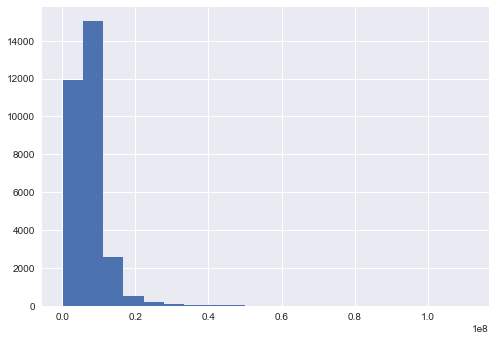

In [16]:
sber['price_doc'].hist(bins=20)

In [17]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_111"; Java(TM) SE Runtime Environment (build 1.8.0_111-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.111-b14, mixed mode)
  Starting server from /Users/bmitchell/anaconda/envs/PY35/h2o_jar/h2o.jar
  Ice root: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmp842zv41a
  JVM stdout: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmp842zv41a/h2o_bmitchell_started_from_python.out
  JVM stderr: /var/folders/g3/yh1hl4qx2j93vqj40hv6k50r0000gn/T/tmp842zv41a/h2o_bmitchell_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,6 months and 22 days !!!
H2O cluster name:,H2O_from_python_bmitchell_h0u2v9
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [18]:
sber.to_csv("train_21.csv")

In [19]:
sber.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

In [20]:
sub_area = pd.get_dummies(sber.sub_area.unique())

In [21]:
sub_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 146 columns):
Ajeroport                         146 non-null uint8
Akademicheskoe                    146 non-null uint8
Alekseevskoe                      146 non-null uint8
Altuf'evskoe                      146 non-null uint8
Arbat                             146 non-null uint8
Babushkinskoe                     146 non-null uint8
Basmannoe                         146 non-null uint8
Begovoe                           146 non-null uint8
Beskudnikovskoe                   146 non-null uint8
Bibirevo                          146 non-null uint8
Birjulevo Vostochnoe              146 non-null uint8
Birjulevo Zapadnoe                146 non-null uint8
Bogorodskoe                       146 non-null uint8
Brateevo                          146 non-null uint8
Butyrskoe                         146 non-null uint8
Caricyno                          146 non-null uint8
Cheremushki                       146 non-null

In [22]:
sub_area[:] = 0

In [41]:
sub_area = sber.pivot(index='id', columns='sub_area', values= 'sub_area')

In [24]:
sub_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 1 to 30473
Data columns (total 146 columns):
Ajeroport                         123 non-null object
Akademicheskoe                    211 non-null object
Alekseevskoe                      100 non-null object
Altuf'evskoe                      68 non-null object
Arbat                             15 non-null object
Babushkinskoe                     123 non-null object
Basmannoe                         98 non-null object
Begovoe                           60 non-null object
Beskudnikovskoe                   166 non-null object
Bibirevo                          230 non-null object
Birjulevo Vostochnoe              268 non-null object
Birjulevo Zapadnoe                115 non-null object
Bogorodskoe                       305 non-null object
Brateevo                          182 non-null object
Butyrskoe                         101 non-null object
Caricyno                          220 non-null object
Cheremushki                   

In [43]:
sub_area.fillna(value=0, inplace=True)

In [44]:
sub_area[sub_area != 0] = 1

In [27]:
sber['price_doc'].mean()

7123035.2777394904

In [28]:
sub_area_prices = pd.pivot_table(sber, values='price_doc', index=None, columns='sub_area', aggfunc='mean')

In [29]:
sub_area_prices = sub_area_prices.T

In [30]:
sub_area_prices.idxmin(), sub_area_prices.min()

(price_doc    Poselenie Klenovskoe
 dtype: object, price_doc    1000000.0
 dtype: float64)

In [31]:
sub_area_prices = pd.pivot_table(sber, values='price_doc', index=None, columns='sub_area', aggfunc='sum')
sub_area_prices = sub_area_prices.T
sub_area_prices.sort_values(by='price_doc', ascending=0)

,price_doc
sub_area,
Poselenie Sosenskoe,9419565851
Nekrasovka,8808198828
Poselenie Vnukovskoe,8528003083
Mitino,5981733987
Poselenie Moskovskij,5164805304
Tverskoe,4820363958
Poselenie Voskresenskoe,3794980126
Mar'ino,3777208349
Krjukovo,3085518561


In [32]:
sber['sub_area'].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
Mitino                             679
Tverskoe                           678
Krjukovo                           518
Mar'ino                            508
Poselenie Filimonkovskoe           496
Juzhnoe Butovo                     451
Poselenie Shherbinka               443
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             362
Otradnoe                           353
Nagatinskij Zaton                  327
Nagornoe                           305
Bogorodskoe                        305
Strogino                           301
Izmajlovo                          300
Tekstil'shhiki                     298
Ljublino                           297
Gol'janovo                         295
Severnoe Tushino                   282
Chertanovo Juzhnoe       

In [33]:
sub_area_prices = sub_area_prices/7123035.2777394904

In [34]:
sub_area_prices/7123035.2777394904

,price_doc
sub_area,
Ajeroport,2.397315e-05
Akademicheskoe,4.398086e-05
Alekseevskoe,1.769652e-05
Altuf'evskoe,7.392969e-06
Arbat,4.669552e-06
Babushkinskoe,1.851545e-05
Basmannoe,2.238174e-05
Begovoe,1.256299e-05
Beskudnikovskoe,2.215148e-05


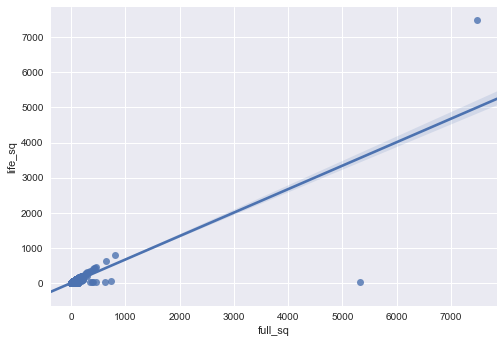

In [35]:
x, y = pd.Series(sber.full_sq, name="full_sq"), pd.Series(sber.life_sq, name="life_sq")
ax = sns.regplot(x=x, y=y, robust = True, marker="o")

In [45]:
sub_area = sub_area.reset_index()

In [46]:
sub_area.head()

sub_area,id,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,Birjulevo Vostochnoe,Birjulevo Zapadnoe,Bogorodskoe,Brateevo,Butyrskoe,Caricyno,Cheremushki,Chertanovo Central'noe,Chertanovo Juzhnoe,Chertanovo Severnoe,Danilovskoe,Dmitrovskoe,Donskoe,Dorogomilovo,Filevskij Park,Fili Davydkovo,Gagarinskoe,Gol'janovo,Golovinskoe,Hamovniki,Horoshevo-Mnevniki,Horoshevskoe,Hovrino,Ivanovskoe,Izmajlovo,Jakimanka,Jaroslavskoe,Jasenevo,Juzhnoe Butovo,Juzhnoe Medvedkovo,Juzhnoe Tushino,Juzhnoportovoe,Kapotnja,Kon'kovo,Koptevo,Kosino-Uhtomskoe,Kotlovka,Krasnosel'skoe,Krjukovo,Krylatskoe,Kuncevo,Kurkino,Kuz'minki,Lefortovo,Levoberezhnoe,Lianozovo,Ljublino,Lomonosovskoe,Losinoostrovskoe,Mar'ina Roshha,Mar'ino,Marfino,Matushkino,Meshhanskoe,Metrogorodok,Mitino,Molzhaninovskoe,Moskvorech'e-Saburovo,Mozhajskoe,Nagatino-Sadovniki,Nagatinskij Zaton,Nagornoe,Nekrasovka,Nizhegorodskoe,Novo-Peredelkino,Novogireevo,Novokosino,Obruchevskoe,Ochakovo-Matveevskoe,Orehovo-Borisovo Juzhnoe,Orehovo-Borisovo Severnoe,Ostankinskoe,Otradnoe,Pechatniki,Perovo,Pokrovskoe Streshnevo,Poselenie Desjonovskoe,Poselenie Filimonkovskoe,Poselenie Kievskij,Poselenie Klenovskoe,Poselenie Kokoshkino,Poselenie Krasnopahorskoe,Poselenie Marushkinskoe,Poselenie Mihajlovo-Jarcevskoe,Poselenie Moskovskij,Poselenie Mosrentgen,Poselenie Novofedorovskoe,Poselenie Pervomajskoe,Poselenie Rjazanovskoe,Poselenie Rogovskoe,Poselenie Shhapovskoe,Poselenie Shherbinka,Poselenie Sosenskoe,Poselenie Vnukovskoe,Poselenie Voronovskoe,Poselenie Voskresenskoe,Preobrazhenskoe,Presnenskoe,Prospekt Vernadskogo,Ramenki,Rjazanskij,Rostokino,Savelki,Savelovskoe,Severnoe,Severnoe Butovo,Severnoe Izmajlovo,Severnoe Medvedkovo,Severnoe Tushino,Shhukino,Silino,Sokol,Sokol'niki,Sokolinaja Gora,Solncevo,Staroe Krjukovo,Strogino,Sviblovo,Taganskoe,Tekstil'shhiki,Teplyj Stan,Timirjazevskoe,Troickij okrug,Troparevo-Nikulino,Tverskoe,Veshnjaki,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
sber1 = sber.filter(items=['full_sq', 'life_sq'], axis = 1)

In [48]:
sber1.head()

,id,full_sq,life_sq
0,1,43.0,27.0
1,2,34.0,19.0
2,3,43.0,29.0
3,4,89.0,50.0
4,5,77.0,77.0


In [52]:
sber2 = pd.concat([sber1, sub_area], axis=1)

In [56]:
sber2.head()

,full_sq,life_sq,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,Birjulevo Vostochnoe,Birjulevo Zapadnoe,Bogorodskoe,Brateevo,Butyrskoe,Caricyno,Cheremushki,Chertanovo Central'noe,Chertanovo Juzhnoe,Chertanovo Severnoe,Danilovskoe,Dmitrovskoe,Donskoe,Dorogomilovo,Filevskij Park,Fili Davydkovo,Gagarinskoe,Gol'janovo,Golovinskoe,Hamovniki,Horoshevo-Mnevniki,Horoshevskoe,Hovrino,Ivanovskoe,Izmajlovo,Jakimanka,Jaroslavskoe,Jasenevo,Juzhnoe Butovo,Juzhnoe Medvedkovo,Juzhnoe Tushino,Juzhnoportovoe,Kapotnja,Kon'kovo,Koptevo,Kosino-Uhtomskoe,Kotlovka,Krasnosel'skoe,Krjukovo,Krylatskoe,Kuncevo,Kurkino,Kuz'minki,Lefortovo,Levoberezhnoe,Lianozovo,Ljublino,Lomonosovskoe,Losinoostrovskoe,Mar'ina Roshha,Mar'ino,Marfino,Matushkino,Meshhanskoe,Metrogorodok,Mitino,Molzhaninovskoe,Moskvorech'e-Saburovo,Mozhajskoe,Nagatino-Sadovniki,Nagatinskij Zaton,Nagornoe,Nekrasovka,Nizhegorodskoe,Novo-Peredelkino,Novogireevo,Novokosino,Obruchevskoe,Ochakovo-Matveevskoe,Orehovo-Borisovo Juzhnoe,Orehovo-Borisovo Severnoe,Ostankinskoe,Otradnoe,Pechatniki,Perovo,Pokrovskoe Streshnevo,Poselenie Desjonovskoe,Poselenie Filimonkovskoe,Poselenie Kievskij,Poselenie Klenovskoe,Poselenie Kokoshkino,Poselenie Krasnopahorskoe,Poselenie Marushkinskoe,Poselenie Mihajlovo-Jarcevskoe,Poselenie Moskovskij,Poselenie Mosrentgen,Poselenie Novofedorovskoe,Poselenie Pervomajskoe,Poselenie Rjazanovskoe,Poselenie Rogovskoe,Poselenie Shhapovskoe,Poselenie Shherbinka,Poselenie Sosenskoe,Poselenie Vnukovskoe,Poselenie Voronovskoe,Poselenie Voskresenskoe,Preobrazhenskoe,Presnenskoe,Prospekt Vernadskogo,Ramenki,Rjazanskij,Rostokino,Savelki,Savelovskoe,Severnoe,Severnoe Butovo,Severnoe Izmajlovo,Severnoe Medvedkovo,Severnoe Tushino,Shhukino,Silino,Sokol,Sokol'niki,Sokolinaja Gora,Solncevo,Staroe Krjukovo,Strogino,Sviblovo,Taganskoe,Tekstil'shhiki,Teplyj Stan,Timirjazevskoe,Troickij okrug,Troparevo-Nikulino,Tverskoe,Veshnjaki,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,43.0,27.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34.0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43.0,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,89.0,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.0,77.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
del sber2['Poselenie Klenovskoe']

In [58]:
sber2 = sber2.dropna()

In [59]:
sber2.to_csv('lifesqImpute.csv')

In [68]:
sber3 = sber2.drop(sber2[(sber2.full_sq > 100) & (sber2.life_sq < 100)].index)

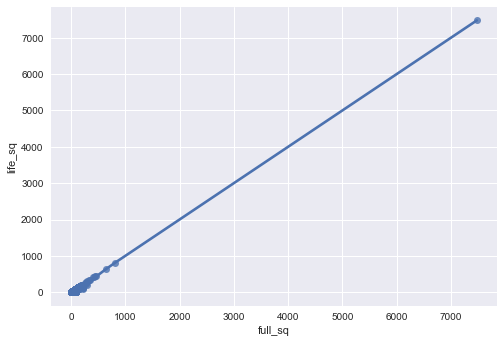

In [70]:
x, y = pd.Series(sber3.full_sq, name="full_sq"), pd.Series(sber3.life_sq, name="life_sq")
ax = sns.regplot(x=x, y=y, lowess = True, marker="o")

In [73]:
sber3.to_csv('lifesqImpute1.csv')

In [89]:
sber4 = pd.concat([sber1, sub_area], axis=1)

In [90]:
sber4 = sber4[sber4.isnull().any(axis=1)]


In [91]:
sber4.to_csv('lifesqImpute2.csv')

In [94]:
sber5 = pd.read_csv("train_21.csv")

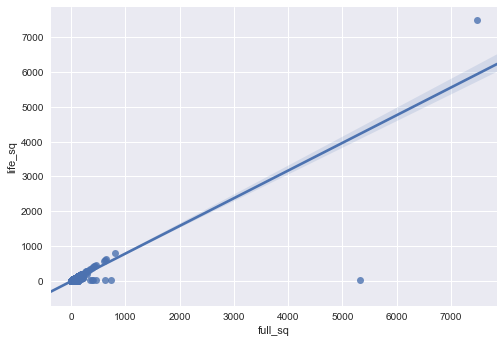

In [97]:
x, y = pd.Series(sber5.full_sq, name="full_sq"), pd.Series(sber5.life_sq, name="life_sq")
ax = sns.regplot(x=x, y=y, robust = True, marker="o")